Frequentist estimator of the failure probability of the new method:  0.08

Null hypotesis H0: p>=15%
> Bayesian way: The null hypotesis H0 is rejected at the 5% level of significance
> Frequentist way: The null hypotesis H0 is not rejected at the 2.342005 % level of significance

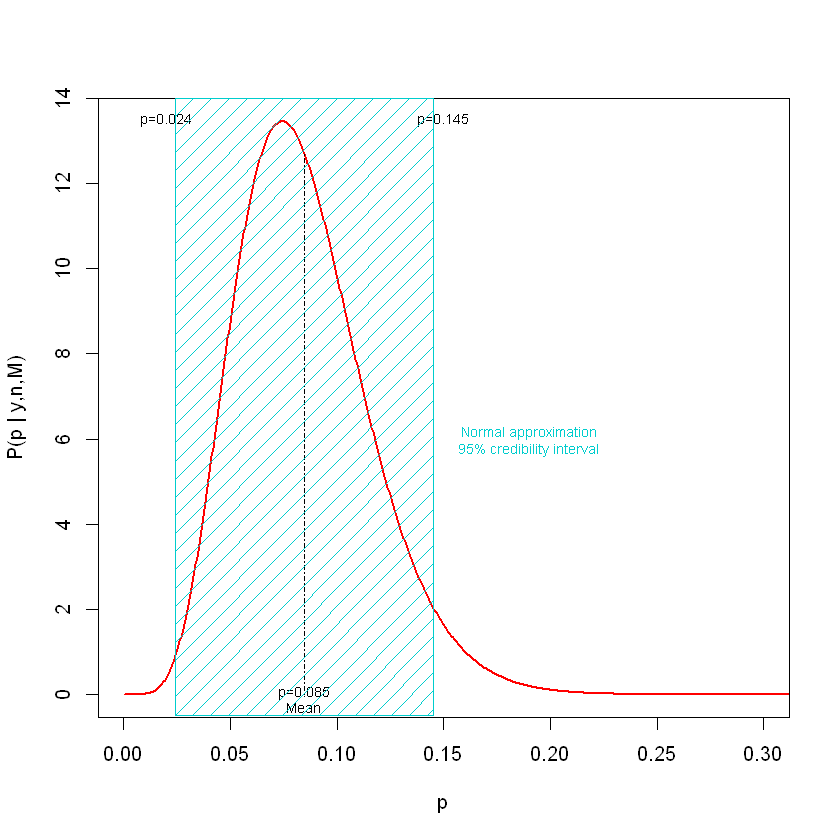

In [276]:
#Exercise 1

#Question a: y=Number of times the new method fails to detect the disease follows a binomial distribution 



n<-75
y<-6
cat("Frequentist estimator of the failure probability of the new method: ", y/n)          #Question b



m<-0.15                                      #Question c
sigma<-0.14
var<-sigma^2
alpha<-(m/var)*(m-m^2-var)
beta<-((1-m)/var)*(m-m^2-var)

n.sample<-2000
delta.p<-1/n.sample
p<-seq(from=1/(2*n.sample), by=1/n.sample , length.out=n.sample)

beta.mean<-function(a,b){
    a/(a+b)
}
beta.sq<-function(a,b){
    sqrt((a*b)/((a+b+1)*(a+b)^2))
}

posterior<-dbeta(x=p, alpha+y, beta+n-y)
plot(p, posterior, type="l", col="red", lwd=2, xlab="p", ylab=paste("P(p | y,n,M)"), xlim=c(0, 0.3))
segments(x0=beta.mean(alpha+y, beta+n-y), y0=0, x1=beta.mean(alpha+y, beta+n-y), y1=dbeta(x=beta.mean(alpha+y, beta+n-y),
    alpha+y, beta+n-y), lty=10)
text(beta.mean(alpha+y, beta+n-y), -0.1, "p=0.085\nMean", cex=0.7)
text(0.15, 13.5, "p=0.145", cex=0.7)
text(0.02, 13.5, "p=0.024", cex=0.7)
rect(xleft = beta.mean(alpha+y, beta+n-y)-1.96*beta.sq(alpha+y, beta+n-y), 
     xright = beta.mean(alpha+y, beta+n-y)+1.96*beta.sq(alpha+y, beta+n-y), ybottom=-0.5, ytop=14, density=10, col = "cyan3")
text(0.19, 6, "Normal approximation\n95% credibility interval",
     cex=0.7, col="cyan3")


cat("\n\nNull hypotesis H0: p>=15%")                                                                         #Question d
if(pbeta(0.15, alpha+y, beta+n-y, lower.tail=FALSE) < 0.05){
    cat("\n> Bayesian way: The null hypotesis H0 is rejected at the 5% level of significance")
}else{
    cat("\n> Bayesian way: The null hypotesis H0 is not rejected at the 5% level of significance")
}
       

S<-sum(dbinom(0:5, size=n, prob=0.15))  #Level of significance 
Freq<-binom.test(y, n, p = 0.15, alternative = "less", conf.level = 1-S)                                         #Question e
if(Freq$p.value < S){                                                       
    cat("\n> Frequentist way: The null hypotesis H0 is rejected at the", S*100, "% level of significance")
}else{
    cat("\n> Frequentist way: The null hypotesis H0 is not rejected at the", S*100, "% level of significance")
}




 Uniform  prior
> Mean:  0.6645833 
> Median:  0.663889 
> Variance:  0.001384549 
> 95% Credibility interval: ( 0.5936468 , 0.7394654 )

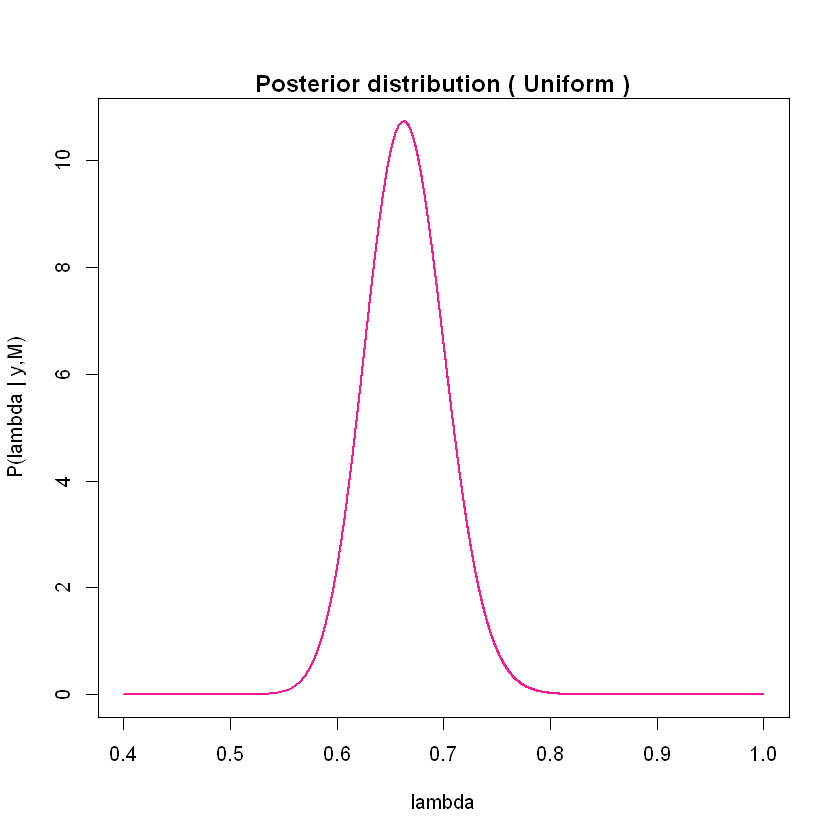



 Jeffrey  prior
> Mean:  0.6635417 
> Median:  0.6628474 
> Variance:  0.001382378 
> 95% Credibility interval: ( 0.5926624 , 0.7383665 )

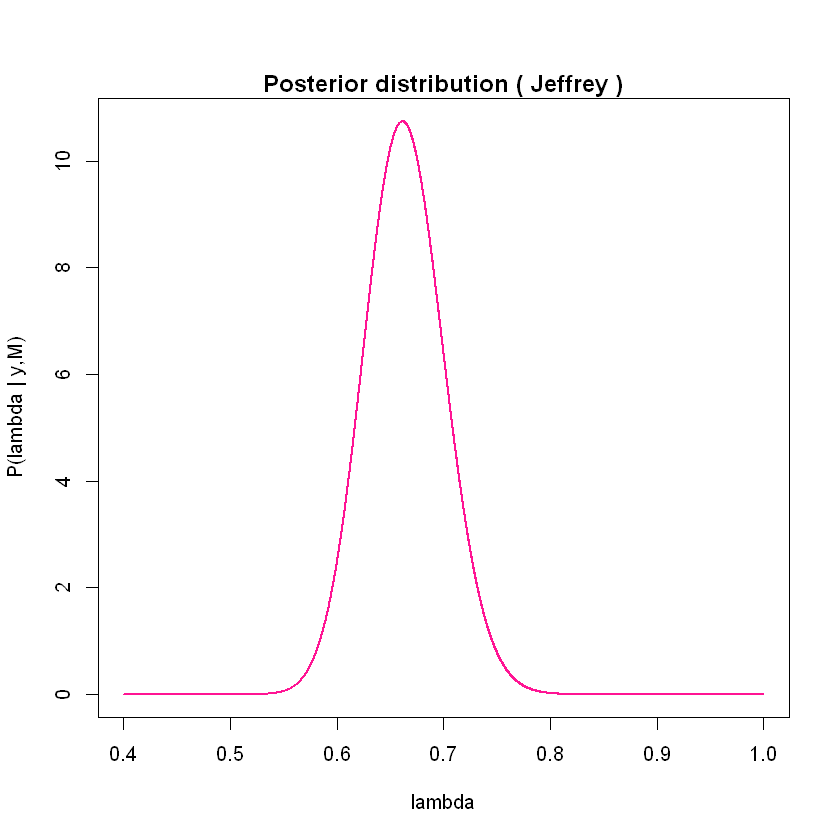

In [49]:
#Exercise 2

library(tidyverse)
Data<-tibble("y.deaths"=c(0,1,2,3,4), "n1.obs"=c(109,65,22,3,1), "n2.obs"=c(144,91,32,11,2))

delta.lambda<-0.0001
lambda.min<-0.4
lambda.max<-1
lambda<-seq(from=lambda.min, to=lambda.max, by=delta.lambda)



Bayes<-function(a, l){
    a.new<-a+sum(Data[[1]]*Data[[2]])+sum(Data[[1]]*Data[[3]])
    l.new<-l+sum(Data[[2]])+sum(Data[[3]])
    param<-c(a.new, l.new)
    return(param)
}
shapes<-list(1, 0.5)
rates<-0
name<-list("Uniform", "Jeffrey")

Main<-function(S, N, R){
    posterior.param<-Bayes(S, R)
    posterior<-dgamma(lambda, shape=posterior.param[1], rate=posterior.param[2])
    plot(lambda, posterior, type="l", xlim=c(lambda.min, lambda.max), col="deeppink", lwd=2, xlab="lambda", 
         ylab="P(lambda | y,M)")
    title(main=paste("Posterior distribution (", N, ")"), line=0.3, cex.main=1.2)
    
    cat("\n\n", N, " prior")
    cat("\n> Mean: ", posterior.param[1]/posterior.param[2], 
        "\n> Median: ", qgamma(0.5, shape=posterior.param[1], rate=posterior.param[2]),
        "\n> Variance: ", posterior.param[1]/(posterior.param[2])^2, 
        "\n> 95% Credibility interval: (", qgamma(0.025, shape=posterior.param[1], rate=posterior.param[2]), ",",
        qgamma(0.975, shape=posterior.param[1], rate=posterior.param[2]), ")")
}
walk2(shapes, name, Main, rates)




In [287]:
# Exercise 3

library(tidyverse)

delta.p<-0.0001
p.min<-0
p.max<-1
p<-seq(from=p.min, to=p.max, by=delta.p)



Estimator <- function(y, n, name){
    cat("\n\n", name, "\n> Frequentist estimator for p: ", y/n)   
}
Data1<-tibble(y=c(11, 9), n=c(116, 165), name=c("First sample", "Second sample"))
Data1 %>% pwalk(Estimator)



beta.mean <- function(a,b){
    a/(a+b)
}
beta.var <- function(a,b){
    (a*b)/((a+b+1)*(a+b)^2)
}
Bacter <- function(y, n, name, alpha, beta, S){
    a<-alpha+y
    b<-beta+n-y
    posterior<-dbeta(p, a, b)
    Low<-qgamma(0.025, a, b)
    High<-qgamma(0.975, a, b)
    
    #plot(p, posterior, type="l", xlim=c(p.min, 0.2), col="deeppink", lwd=2, xlab="p", ylab="P(p | y,n,M)")
    #title(main=paste("Posterior distribution (", name, ")"), line=0.3, cex.main=1.2)
    
    cat("\n\n", name) 
    cat("\n> Bayesian estimator for p: ", p[which.max(posterior)],
        "\n> Posterior mean: ", beta.mean(a,b),
        "\n> Posterior variance: ", beta.var(a,b),
        "\n> 95% Credibility interval: (", Low, ",", High, ")")
    
    if(0.1>Low & 0.1<High){
        cat("\n> Bayesian way: The null hypotesis H0 is not rejected at the 5% level of significance")
    }else{
        cat("\n> Bayesian way: The null hypotesis H0 is rejected at the 5% level of significance")
    }
    
    Freq<-binom.test(y, n, p = 0.1, alternative = "two.sided", conf.level = 1-S) 
    if(Freq$p.value < S){   #p-value < level of significance                                          
        cat("\n> Frequentist way: The null hypotesis H0 is rejected at the", S*100, "% level of significance")
    }else{
        cat("\n> Frequentist way: The null hypotesis H0 is not rejected at the", S*100, "% level of significance")
    }
}

Data2<-Data1 %>% add_row(y=9, n=165, name="Third sample") %>% 
            add_column(alpha=c(1,1,12), beta=c(10,10,115), S=c(0.0425, 0.0511, 0.0511))
Data2 %>% pwalk(Bacter)



 First sample 
> Frequentist estimator for p:  0.09482759

 Second sample 
> Frequentist estimator for p:  0.05454545

 First sample
> Bayesian estimator for p:  0.088 
> Posterior mean:  0.09448819 
> Posterior variance:  0.0006684388 
> 95% Credibility interval: ( 0.05391804 , 0.1711482 )
> Bayesian way: The null hypotesis H0 is not rejected at the 5% level of significance
> Frequentist way: The null hypotesis H0 is not rejected at the 4.25 % level of significance

 Second sample
> Bayesian estimator for p:  0.0517 
> Posterior mean:  0.05681818 
> Posterior variance:  0.0003027677 
> 95% Credibility interval: ( 0.02888788 , 0.1029205 )
> Bayesian way: The null hypotesis H0 is not rejected at the 5% level of significance
> Frequentist way: The null hypotesis H0 is not rejected at the 5.11 % level of significance

 Third sample
> Bayesian estimator for p:  0.069 
> Posterior mean:  0.07191781 
> Posterior variance:  0.0002278008 
> 95% Credibility interval: ( 0.04796801 , 0.1139793 